In [1]:
from keras.models import load_model
import numpy as np
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc, roc_curve, auc, roc_auc_score
import matplotlib as mpl
from nltk.tokenize import WordPunctTokenizer
import re
import numpy as np
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
#set line width
mpl.rcParams['lines.linewidth'] = 6
#set general font size 
mpl.rcParams['font.size'] = 12
#set font size for labels on axes
mpl.rcParams['axes.labelsize'] = 18
#set size of numbers on x-axis
mpl.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
mpl.rcParams['ytick.major.size'] = 5
#set size of markers
mpl.rcParams['lines.markersize'] = 10


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
model = load_model('CNN/cnn_model.h5')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

with open('CNN/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [6]:
token = WordPunctTokenizer()
pattern1 = r'@[A-Za-z0-9_]+'
pattern2 = r'https?://[^ ]+'
combined_pattern = r'|'.join((pattern1, pattern2))
url_pattern = r'www.[^ ]+'
negations_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dict.keys()) + r')\b')
#URL = 'https://services.gingersoftware.com/Ginger/correct/jsonSecured/GingerTheTextFull'
#API_KEY = '6ae0c3a0-afdc-4532-a810-82ded0054236'

def format_tweets(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    clean_tweet_texts = []
    try:
        bom_removed = souped.encode('sloppy-cp1252').decode('utf8').encode('sloppy-cp1252').decode('utf8').replace(u"\x1a", "?")
    except:
        bom_removed = souped
    strip = re.sub(combined_pattern, '', bom_removed)
    strip = re.sub(url_pattern, '', strip)
    convert_lower_case = strip.lower()
    neg_handled = neg_pattern.sub(lambda i: negations_dict[i.group()], convert_lower_case)
    only_letters = re.sub("[^a-zA-Z]", " ", neg_handled)
    final_words = [i for i  in token.tokenize(only_letters) if len(i) > 1]
    text = (" ".join(final_words)).strip()
    return text

In [7]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/intro_final', echo=False, max_overflow=-1)
query = 'select * from tweets_700'

df_700 = pd.read_sql(query, engine)

df_700.head()

,text,target
0,"""@zerohedge\n\n#iPhoneXS/#iPhoneXSMax PREORDER...",0
1,A 6.1 inch 720p display in 2018? And they tell...,0
2,Apple has 'defied gravity' with the iPhone for...,1
3,Apple is about to change its business model......,0
4,Despite the ability to perform 5 trillion oper...,0


In [8]:
df_700.dropna(inplace=True)
%time
print("Processing tweets\n")
clean_tweet_texts = []
for i in tqdm(range(len(df_700))):
    clean_tweet_texts.append(format_tweets(df_700['text'][i]))
df_700_final = pd.DataFrame(clean_tweet_texts,columns=['text'])
df_700_final['target'] = df_700.target
x_test = df_700['text']
y_test = df_700['target']

Wall time: 0 ns
Processing tweets



100%|██████████████████████████████████████████████████████████████████████████████| 711/711 [00:00<00:00, 3174.16it/s]


In [9]:
x_test_iphone_sequences = tokenizer.texts_to_sequences(x_test)
x_test_iphone_sequences = pad_sequences(x_test_iphone_sequences, maxlen=47)
y_hat = model.predict(x_test_iphone_sequences)
y_not_round = model.predict(x_test_iphone_sequences)

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[174  49]
 [ 40 448]]


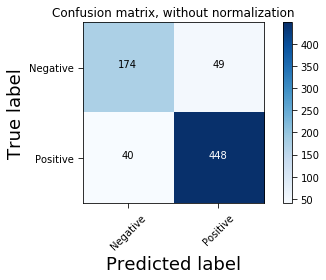

<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       223
           1       0.90      0.92      0.91       488

   micro avg       0.87      0.87      0.87       711
   macro avg       0.86      0.85      0.85       711
weighted avg       0.87      0.87      0.87       711



In [11]:
y_hat = [np.round(i) for i in y_hat]

cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

class_names = ['Negative', 'Positive']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plt.show()

print(classification_report(y_test, y_hat))

In [12]:
print('Accuracy for our labelled iPhone dataset = ',accuracy_score(y_test, y_hat))

Accuracy for our labelled iPhone dataset =  0.8748241912798875


In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<center><h1>Plotting our final model</h1></center>
<img src='model_plot.png'></img><br>


<b>The input is first passed to our word2vec embedding layer and then split to 3 convolutional 1d branches (Multilinear Convolutions) with different filter sizes. The output from all 3 branches are pooled and concatinated and then this vector is passed to 3 dense layers with 0.2 dropout.
Finally a sigmoid activation function is used for predicting class probabilities and the model uses cross entropy function to calculate loss.</b>

We have used a <b>Naive Inception module</b>(Without dimentionality reduction/bottleneck layer). Although this module is computationally expensive, it helps try out different sets of filters for training the network and gets the best of everything.
<br>
Reference: https://arxiv.org/pdf/1409.4842.pdf

In [14]:
df = pd.read_csv('final_iphone_tweets.csv', sep=',', encoding='latin1')
x_test = np.array(df['text'])

In [15]:
x_test = [format_tweets(i) for i in x_test]

In [16]:
for i in x_test[:5]:
    print(i)

iphonexs iphonexsmax preorders weaker than iphone rosenblatt says
inch display in and they tell you that it is the most advanced lcd in the world and yall believ
apple has defied gravity with the iphone for last years fmr head of retail now ceo ron johnson
apple is about to change its business model and it going to affect the upgrade cycle revenue and services apple upcoming streaming service is reportedly so bland staff are calling it expensive nbc
despite the ability to perform trillion operations second the iphone still can do something your dedicated fall of apple has started


In [17]:
x_test[:3]

['iphonexs iphonexsmax preorders weaker than iphone rosenblatt says',
 'inch display in and they tell you that it is the most advanced lcd in the world and yall believ',
 'apple has defied gravity with the iphone for last years fmr head of retail now ceo ron johnson']

In [18]:
sequences = tokenizer.texts_to_sequences(x_test)

In [19]:
sequences[:3]

[[3673, 13594, 40385, 32450, 188, 326, 409],
 [4437,
  3807,
  9,
  7,
  68,
  253,
  5,
  13,
  6,
  3,
  2,
  329,
  6569,
  9451,
  9,
  2,
  283,
  7,
  1248,
  26141],
 [818,
  89,
  6319,
  20,
  2,
  326,
  10,
  85,
  426,
  78239,
  299,
  11,
  5489,
  26,
  11337,
  5581,
  5798]]

In [20]:
x_test_seq = pad_sequences(sequences, maxlen=47)

In [21]:
x_test_seq.shape

(2647, 47)

In [22]:
y_hat = model.predict(x_test_seq)

In [23]:
y_not_round = model.predict(x_test_seq)
y_hat = [int(np.round(i)) for i in y_hat]

In [24]:
final_df = pd.DataFrame(
    {'text': x_test,
     'target': y_hat
    })

final_df.head()

,text,target
0,iphonexs iphonexsmax preorders weaker than iph...,0
1,inch display in and they tell you that it is t...,0
2,apple has defied gravity with the iphone for l...,1
3,apple is about to change its business model an...,0
4,despite the ability to perform trillion operat...,0


In [25]:
for i in final_df['text'][:5]:
    print(i)

iphonexs iphonexsmax preorders weaker than iphone rosenblatt says
inch display in and they tell you that it is the most advanced lcd in the world and yall believ
apple has defied gravity with the iphone for last years fmr head of retail now ceo ron johnson
apple is about to change its business model and it going to affect the upgrade cycle revenue and services apple upcoming streaming service is reportedly so bland staff are calling it expensive nbc
despite the ability to perform trillion operations second the iphone still can do something your dedicated fall of apple has started


In [26]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [27]:
df = final_df
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 2 columns):
text      2647 non-null object
target    2647 non-null int64
dtypes: int64(1), object(1)
memory usage: 41.4+ KB


In [28]:
neg_tweets = df[df.target == 0]
neg_text = []
for t in neg_tweets.text:
    neg_text.append(t)
neg_text = pd.Series(neg_text).str.cat(sep=' ')

In [29]:
neg_text = neg_text.replace('iphonexs', '')
neg_text = neg_text.replace('iphonexr', '')
neg_text = neg_text.replace('phone', '')
neg_text = neg_text.replace('iphone xr', '')
neg_text = neg_text.replace('max', '')
neg_text = neg_text.replace('iphonexsmax', '')
neg_text = neg_text.replace('xs', '')
neg_text = neg_text.replace('xsmax', '')
neg_text = neg_text.replace('apple', '')
neg_text = neg_text.replace('iphone', "")

In [30]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

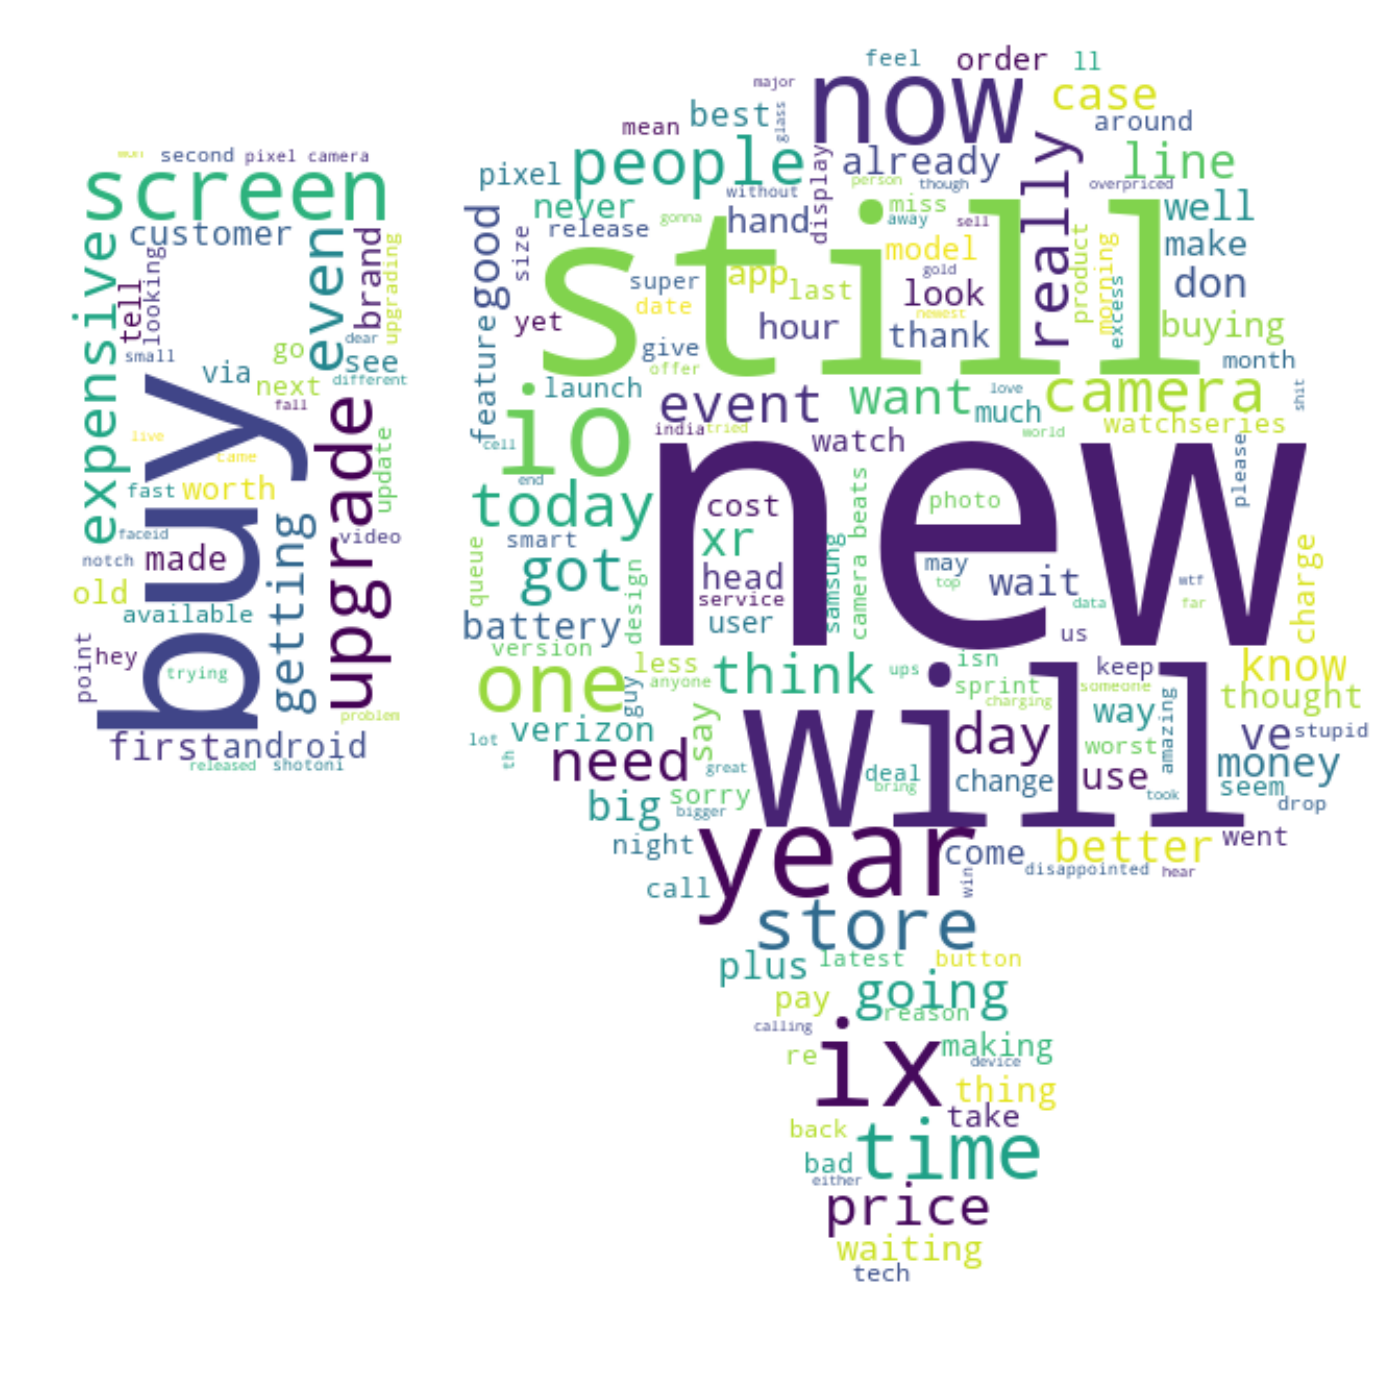

In [31]:
negative_mask = np.array(Image.open('thumbs_down.png'))
wc = WordCloud(width=1500, height=1500, mask=negative_mask, max_font_size=180, background_color='white').generate(neg_text)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
pos_tweets = df[df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

In [33]:
pos_string = pos_string.replace('iphonexs', '')
pos_string = pos_string.replace('iphonexr', '')
pos_string = pos_string.replace('iphone xr', '')
pos_string = pos_string.replace('max', '')
pos_string = pos_string.replace('phone', '')
pos_string = pos_string.replace('iphonexsmax', '')
pos_string = pos_string.replace('xs', '')
pos_string = pos_string.replace('xsmax', '')
pos_string = pos_string.replace('apple', '')
pos_string = pos_string.replace('iphone', "")

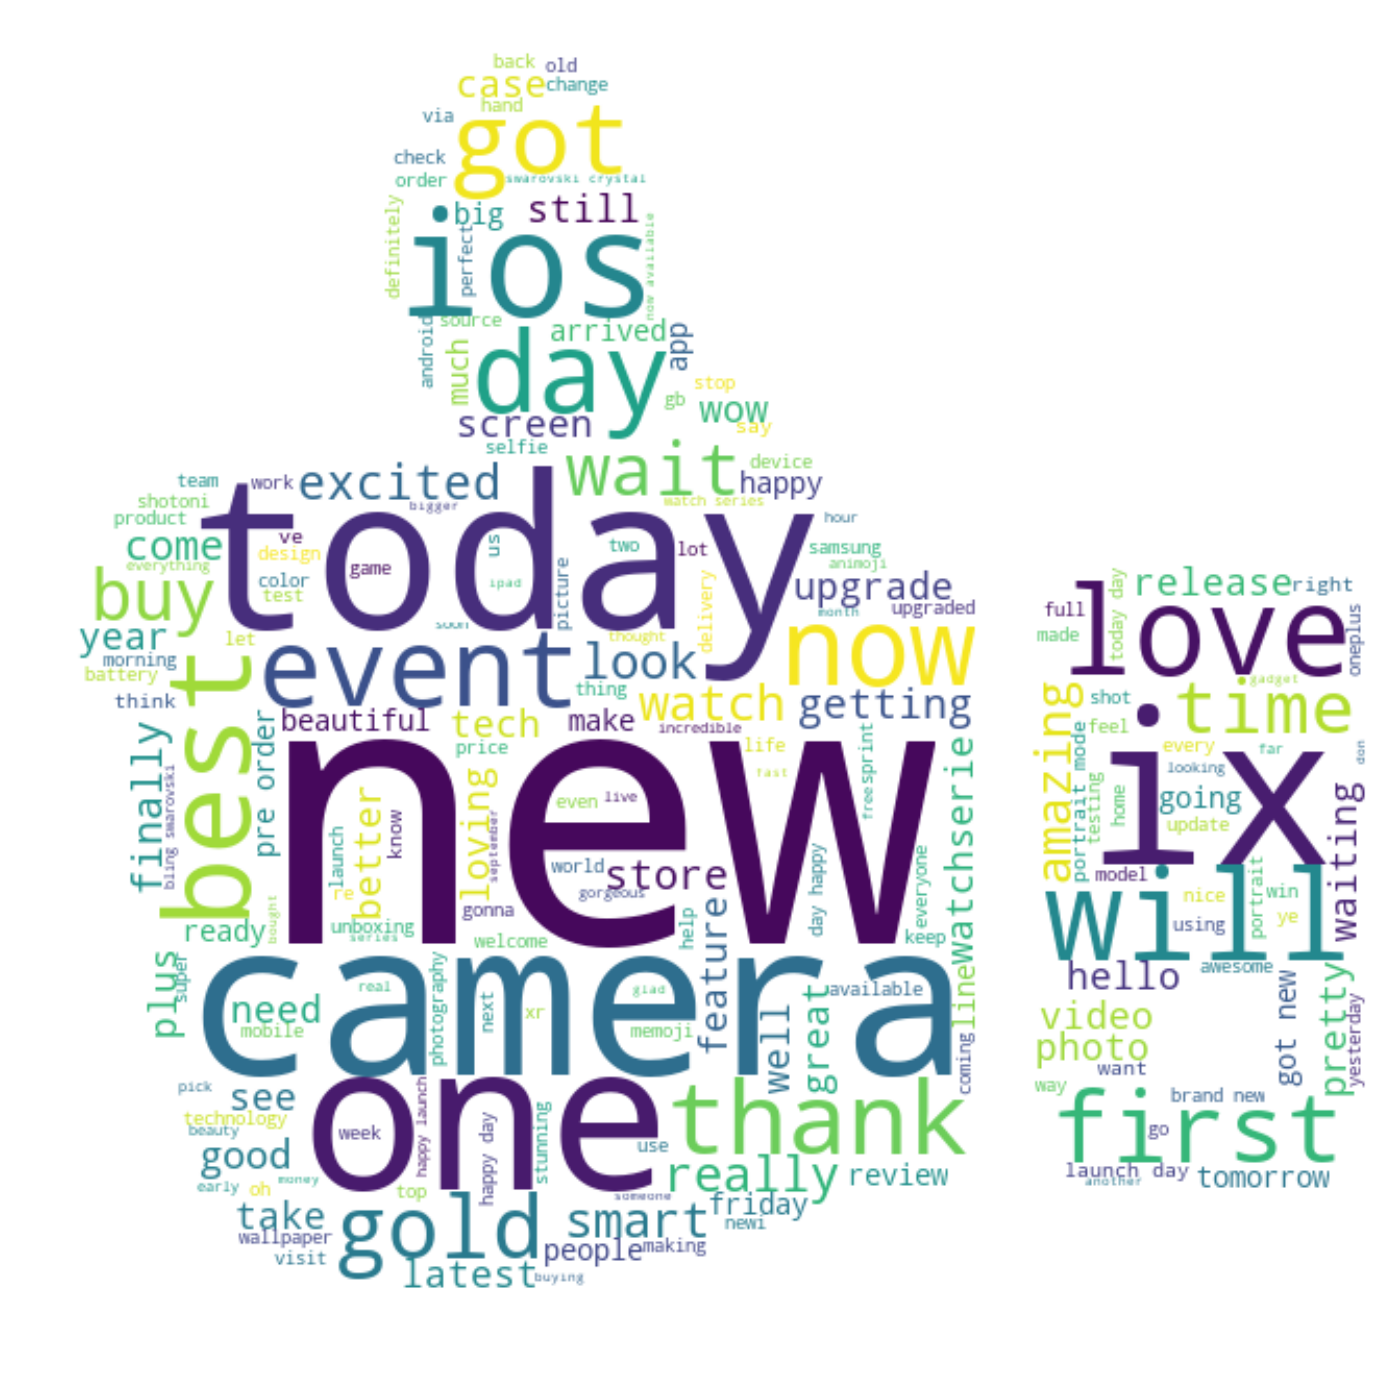

In [34]:
positive_mask = np.array(Image.open('thumbs_up.png'))
wc = WordCloud(width=1500, height=1500, mask=positive_mask, max_font_size=180, background_color='white').generate(pos_string)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1><b>Using countVectorizer to get unique tokens</b></h1>

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words='english')
count_vec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
len(count_vec.get_feature_names())

4759

In [33]:
negative_doc_matrix = count_vec.transform(df[df.target == 0].text)
positive_doc_matrix = count_vec.transform(df[df.target == 1].text)

In [34]:
neg_termFreq = np.sum(negative_doc_matrix,axis=0)
pos_termFreq = np.sum(positive_doc_matrix,axis=0)

In [35]:
neg = np.squeeze(np.asarray(neg_termFreq))
pos = np.squeeze(np.asarray(pos_termFreq))

In [36]:
term_freq_df = pd.DataFrame([neg,pos],columns=count_vec.get_feature_names()).transpose() #DF with positive and negative term counts

In [37]:
doc_matrix = count_vec.transform(df.text)

In [38]:
df = df.sort_values(by=['target'])
df = df.reset_index(drop=True)
df[df['target']==1].tail(), df[df['target']==0].tail()

(                                                   text  target
 2642  stripe print black bling swarovski crystal iph...       1
 2643  stripe print crystal new ipad case iphonecase ...       1
 2644  such great platform of tech news what phone ip...       1
 2645  stop in to the roseville best buy and pre orde...       1
 2646  love when people realize they are actually sav...       1,
                                                   text  target
 769  why wait for the prices to fall to grab the la...       0
 770  first thoughts of iphone xs why couldn they do...       0
 771  why the iphone xs iphone xs max are expensive ...       0
 772  first they took away the headphone jack then t...       0
 773  who still awake with their new iphones iphonex...       0)

In [39]:
%time
negative_batches = np.linspace(774,2646,100).astype(int) #creates array of 0 to 798197 and splits it to 100 bins
i=0
neg_termFreq = []
while i < len(negative_batches)-1:
    batchresult = np.sum(doc_matrix[negative_batches[i]:negative_batches[i+1]].toarray(),axis=0)
    neg_termFreq.append(batchresult)
    if (i % 10 == 0) | (i == len(negative_batches)-2):
        print(negative_batches[i+1],"term freuquencies calculated")
    i += 1

Wall time: 0 ns
792 term freuquencies calculated
982 term freuquencies calculated
1171 term freuquencies calculated
1360 term freuquencies calculated
1549 term freuquencies calculated
1738 term freuquencies calculated
1927 term freuquencies calculated
2116 term freuquencies calculated
2305 term freuquencies calculated
2494 term freuquencies calculated
2646 term freuquencies calculated


In [40]:
%time
positive_batches = np.linspace(0,773,100).astype(int)
i=0
pos_termFreq = []
while i < len(positive_batches)-1:
    batchresult = np.sum(doc_matrix[positive_batches[i]:positive_batches[i+1]].toarray(),axis=0)
    pos_termFreq.append(batchresult)
    if (i % 10 == 0) | (i == len(positive_batches)-2):
        print(positive_batches[i+1],"term freuquencies calculated")
    i += 1

Wall time: 0 ns
7 term freuquencies calculated
85 term freuquencies calculated
163 term freuquencies calculated
242 term freuquencies calculated
320 term freuquencies calculated
398 term freuquencies calculated
476 term freuquencies calculated
554 term freuquencies calculated
632 term freuquencies calculated
710 term freuquencies calculated
773 term freuquencies calculated


In [41]:
neg = np.sum(neg_termFreq,axis=0)
pos = np.sum(pos_termFreq,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=count_vec.get_feature_names()).transpose()

In [42]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
iphonexs,1437,680,2117
iphone,930,315,1245
new,535,241,776
apple,477,187,664
xs,440,108,548
iphonexsmax,411,110,521
phone,141,77,218
max,173,32,205
iphonexr,156,28,184
day,76,66,142


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

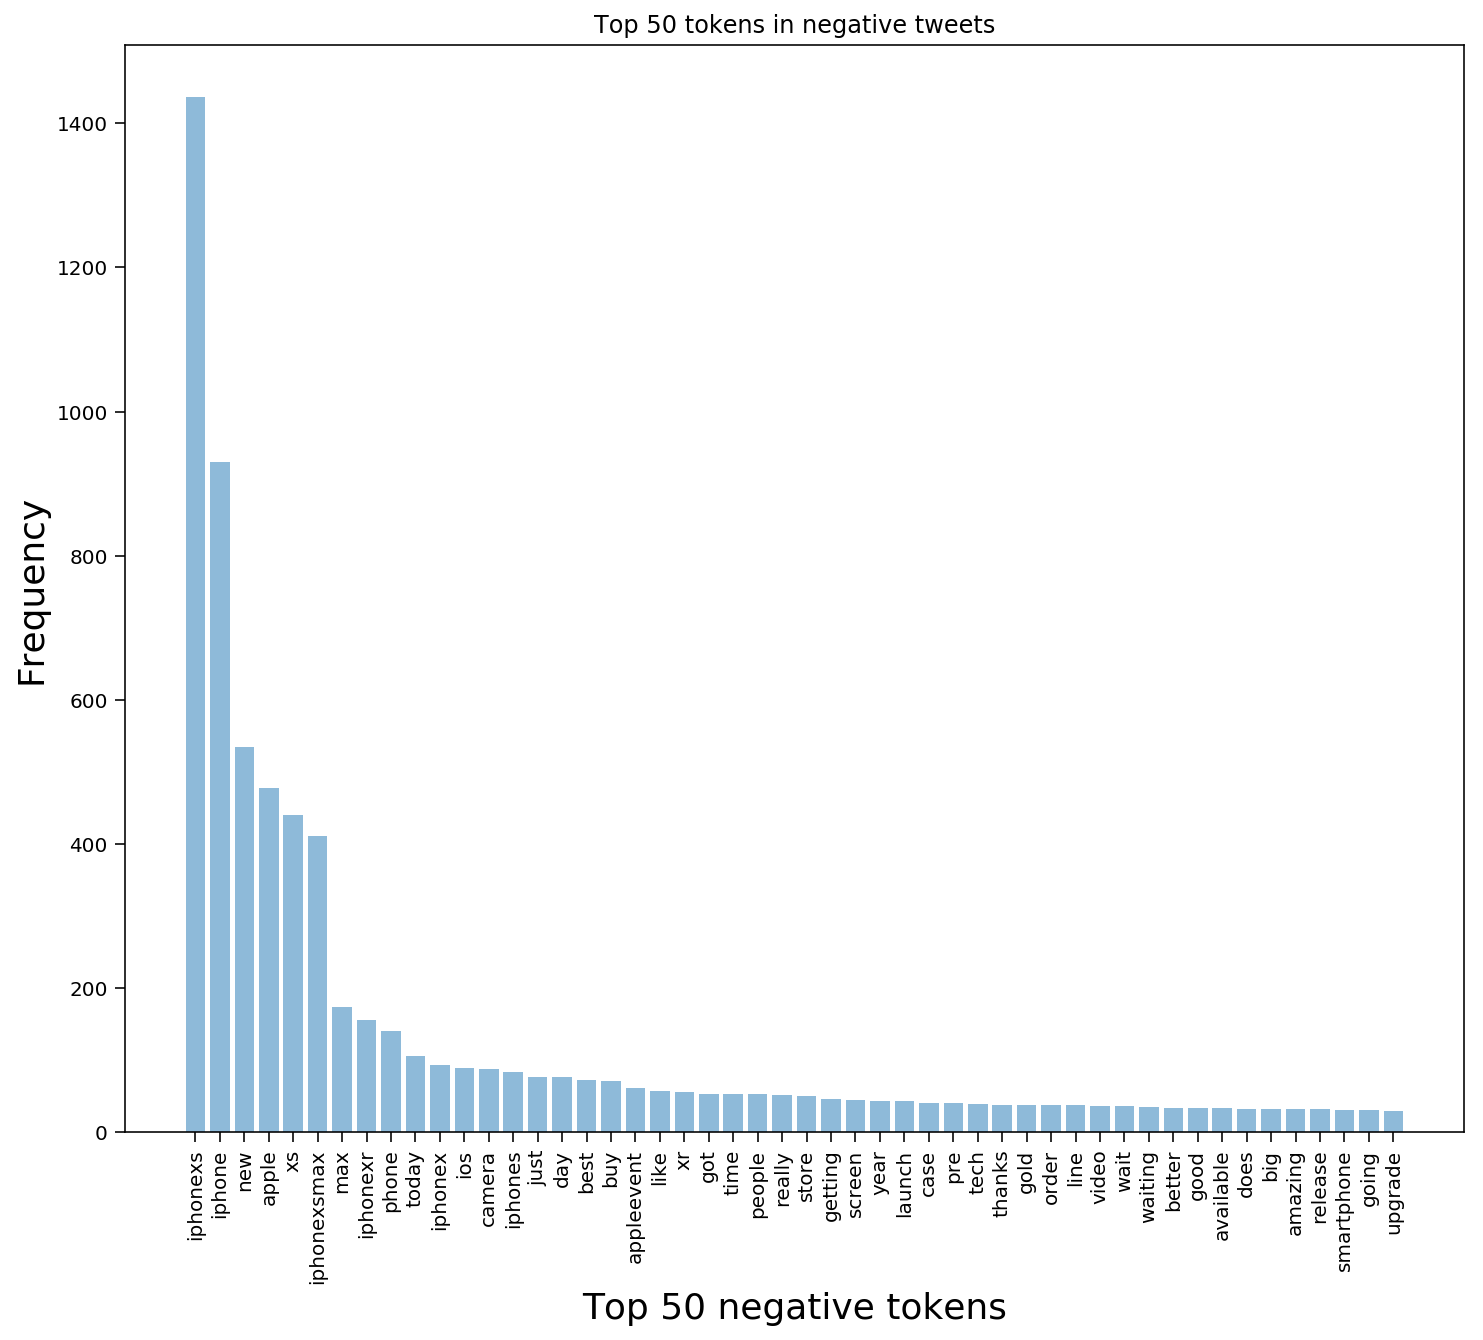

In [43]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

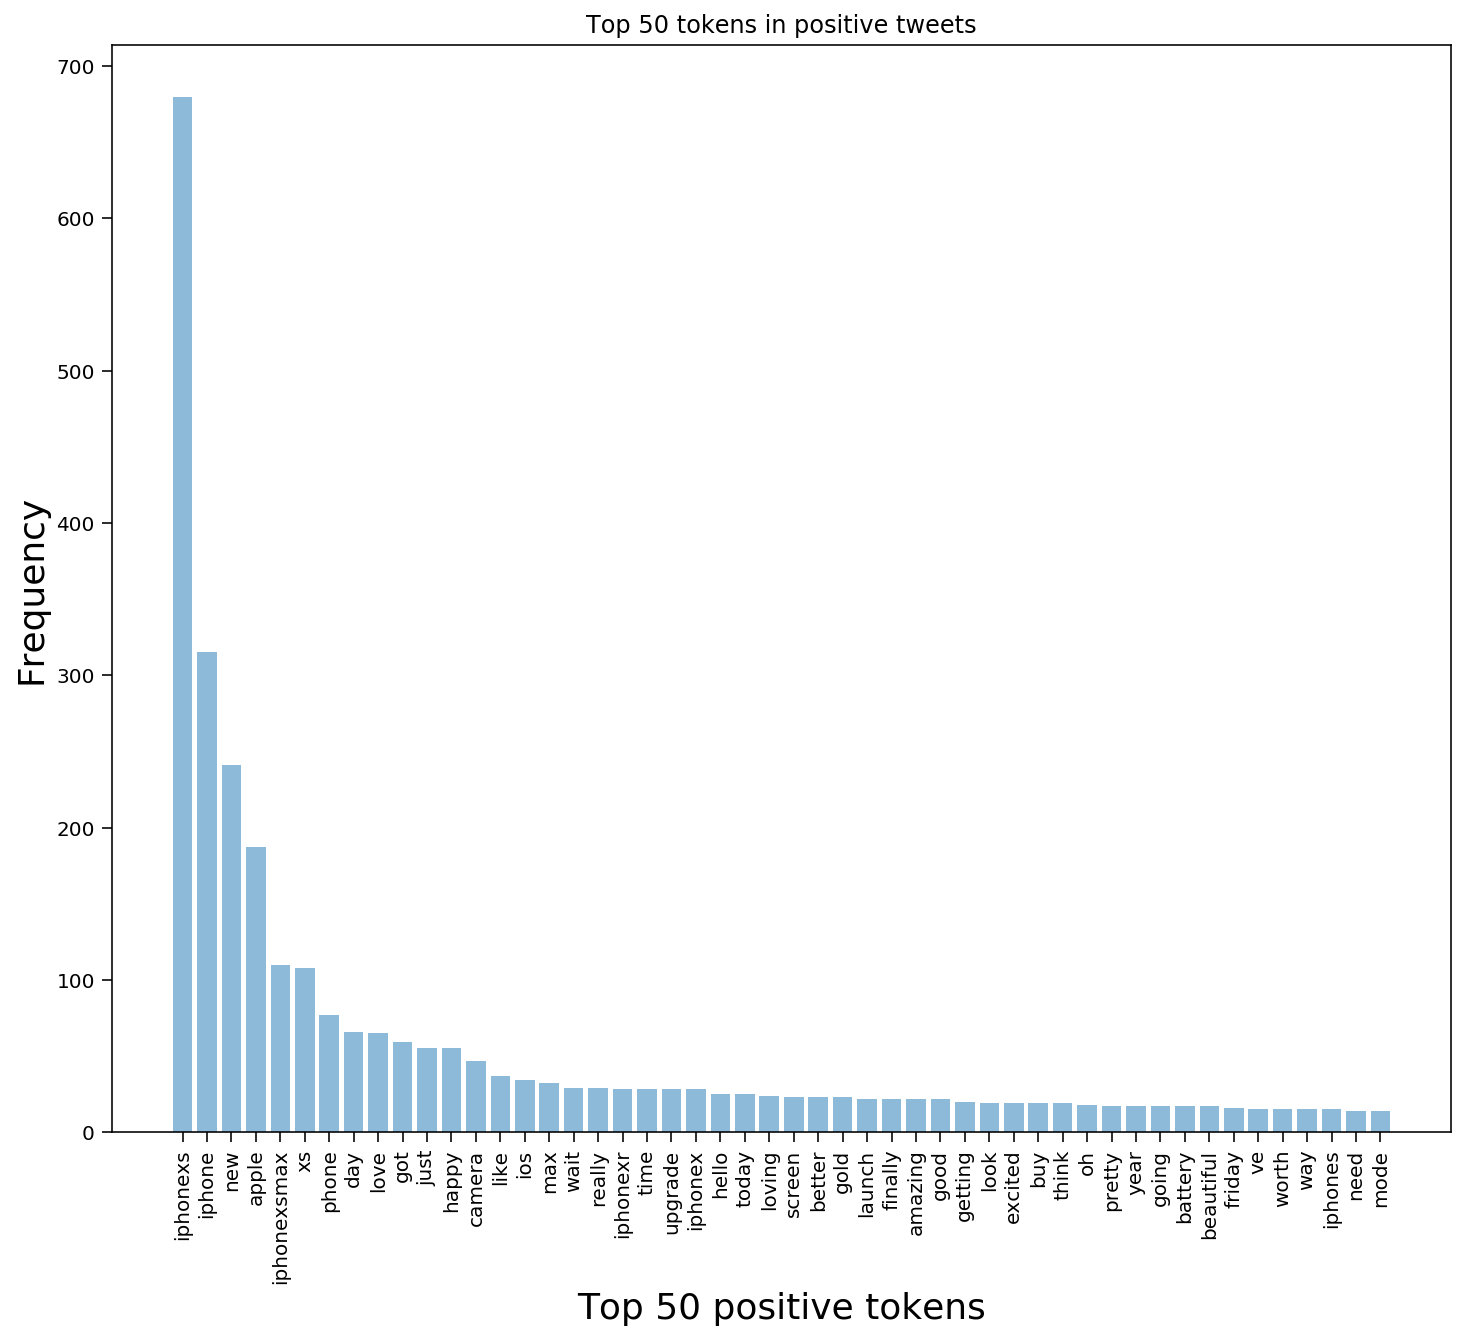

In [44]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

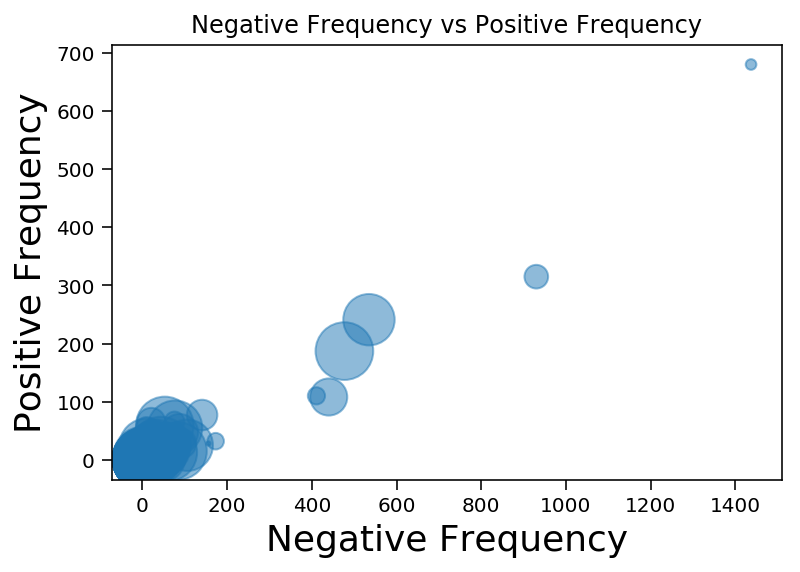

In [45]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
N = 50
area = (30 * np.random.rand(N))**2
plt.scatter(term_freq_df['negative'], term_freq_df['positive'], s=area, alpha=0.5)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.show()

In [46]:
sentiments = {0: 'Negative', 1: 'Positive'}
final_df['target'] = final_df['target'].map(sentiments)

In [47]:
final_df.head()

,text,target
0,iphonexs iphonexsmax preorders weaker than iph...,Negative
1,inch display in and they tell you that it is t...,Negative
2,apple has defied gravity with the iphone for l...,Positive
3,apple is about to change its business model an...,Negative
4,despite the ability to perform trillion operat...,Negative


In [48]:
'Positive = ', final_df['target'].value_counts()['Positive'], 'Negative = ', final_df['target'].value_counts()['Negative']

('Positive = ', 1873, 'Negative = ', 774)

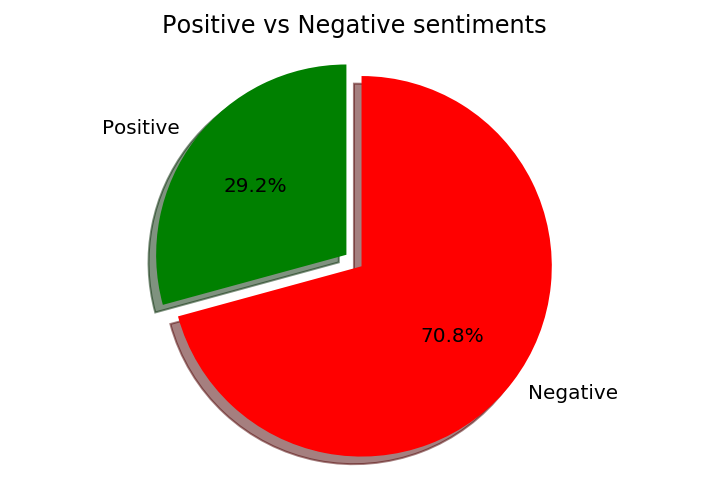

In [49]:
labels = 'Positive', 'Negative'
sizes = [final_df['target'].value_counts()['Negative'], final_df['target'].value_counts()['Positive']]
colors = ['green', 'red']
fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, explode=explode)
ax1.axis('equal')
plt.title('Positive vs Negative sentiments')
plt.show()

<H1> Testing some tweets that are not very straight forward </H1>

In [115]:
test_tweets0 = ['"i love the iphonexs max" said no one ever',
              'iphonexr is insane',
              'The new iphone not bad',
              'i love the new iphone but its way too expensive for me.',
              'wow the iphonexr is a rip off',
              'the camera in iphone xs max is excellent',
              'why are people even buying iphonexr?',
              'iphone xs is about average',
              'I have been thinking of an iPhone xs joke. It is just a slightly improved iPhone x joke.',
              'iphonexs is lit'
              ]
test_tweets = []
for i in tqdm(range(len(test_tweets0))):
    test_tweets.append(format_tweets(test_tweets0[i]))

sequences = tokenizer.texts_to_sequences(test_tweets)
x_test_seq = pad_sequences(sequences, maxlen=47)
y_hat = model.predict(x_test_seq)
y_not_round = model.predict(x_test_seq)
y_hat = [int(np.round(i)) for i in y_hat]
positive_proba = [i[0] for i in y_not_round]
negative_proba = [1-i for i in positive_proba]
y_hat = ['Positive' if i>=0.5 else 'Negative' for i in y_hat]

final_df = pd.DataFrame(
    {'text': test_tweets,
     'target': y_hat,
     'positive probabilities': positive_proba,
     'negative probabilities': negative_proba
    })

final_df

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 908.96it/s]


,text,target,positive probabilities,negative probabilities
0,love the iphonexs max said no one ever,Negative,0.002940,0.997060
1,iphonexr is insane,Positive,0.612377,0.387623
2,the new iphone not bad,Positive,0.574681,0.425319
3,love the new iphone but its way too expensive ...,Negative,0.016390,0.983610
4,wow the iphonexr is rip off,Negative,0.347446,0.652554
5,the camera in iphone xs max is excellent,Positive,1.000000,0.000000
6,why are people even buying iphonexr,Negative,0.004900,0.995100
7,iphone xs is about average,Positive,0.596754,0.403246
8,have been thinking of an iphone xs joke it is ...,Negative,0.084149,0.915851
9,iphonexs is lit,Positive,0.887976,0.112024
